In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
df = pd.read_excel('cleaned_tech.xlsx')
df

,date,symbol,eps,epsEstimated,time,revenue,revenueEstimated,Price3DaysBefore,Price3DaysAfter,epsSurprise,revenueSurprise
0,2024-05-09,AAOI,-0.31,-0.29000,amc,40673000.0,43590000.0,11.95,10.00,-6.896552,-6.691902
1,2023-11-09,AAOI,-0.05,-0.05000,amc,62547000.0,62610000.0,9.69,11.00,0.000000,-0.100623
2,2023-08-03,AAOI,-0.21,-0.28000,amc,41615000.0,45430000.0,6.75,12.38,25.000000,-8.397535
3,2023-05-04,AAOI,-0.25,-0.18000,amc,53030000.0,53770000.0,1.82,1.77,-38.888889,-1.376232
4,2023-02-23,AAOI,-0.19,-0.30000,amc,61584000.0,61270000.0,2.72,2.59,36.666667,0.512486
...,...,...,...,...,...,...,...,...,...,...,...
6014,2023-03-01,ZUO,-0.04,-0.06000,amc,103041000.0,100280000.0,8.56,10.02,33.333333,2.753291
6015,2021-12-01,ZUO,-0.02,-0.01521,amc,89230000.0,90360000.0,19.93,19.12,-31.492439,-1.250553
6016,2021-08-25,ZUO,-0.04,-0.03750,amc,86487000.0,86540000.0,16.21,16.96,-6.666667,-0.061243
6017,2020-03-12,ZUO,-0.09,-0.10000,amc,70393000.0,78214444.0,10.31,7.19,10.000000,-9.999999


In [ ]:
df.loc[df['symbol'] == 'CPNG']

,date,symbol,eps,epsEstimated,time,revenue,revenueEstimated,Price3DaysBefore,Price3DaysAfter,epsSurprise,revenueSurprise
1259,2024-05-07,CPNG,0.05,0.05480,amc,7.114000e+09,6.945686e+09,23.34,22.50,-8.759124,2.423281
1260,2024-02-27,CPNG,0.08,0.06003,amc,6.561000e+09,6.403546e+09,16.39,18.95,33.266700,2.458855
1261,2023-11-07,CPNG,0.05,0.07000,amc,6.183555e+09,6.422090e+09,16.70,15.32,-28.571429,-3.714289
1262,2023-08-08,CPNG,0.08,0.05000,amc,5.837889e+09,5.684300e+09,18.00,19.31,60.000000,2.701986
1263,2023-05-09,CPNG,0.05,0.05000,amc,5.800530e+09,5.638430e+09,17.78,16.05,0.000000,2.874914
1264,2023-02-28,CPNG,0.06,0.05000,amc,5.326774e+09,5.190890e+09,15.22,14.58,20.000000,2.617740
1265,2022-03-02,CPNG,-0.23,-0.20000,amc,5.076693e+09,5.298900e+09,26.52,21.10,-15.000000,-4.193455
1266,2021-08-11,CPNG,-0.13,-0.13000,amc,4.478114e+09,4.478110e+09,39.49,33.87,0.000000,0.000089


In [ ]:

df = df.dropna()
df



,date,symbol,eps,epsEstimated,time,revenue,revenueEstimated,Price3DaysBefore,Price3DaysAfter,epsSurprise,revenueSurprise
0,2024-05-09,AAOI,-0.31,-0.29000,amc,40673000.0,43590000.0,11.95,10.00,-6.896552,-6.691902
1,2023-11-09,AAOI,-0.05,-0.05000,amc,62547000.0,62610000.0,9.69,11.00,0.000000,-0.100623
2,2023-08-03,AAOI,-0.21,-0.28000,amc,41615000.0,45430000.0,6.75,12.38,25.000000,-8.397535
3,2023-05-04,AAOI,-0.25,-0.18000,amc,53030000.0,53770000.0,1.82,1.77,-38.888889,-1.376232
4,2023-02-23,AAOI,-0.19,-0.30000,amc,61584000.0,61270000.0,2.72,2.59,36.666667,0.512486
...,...,...,...,...,...,...,...,...,...,...,...
6014,2023-03-01,ZUO,-0.04,-0.06000,amc,103041000.0,100280000.0,8.56,10.02,33.333333,2.753291
6015,2021-12-01,ZUO,-0.02,-0.01521,amc,89230000.0,90360000.0,19.93,19.12,-31.492439,-1.250553
6016,2021-08-25,ZUO,-0.04,-0.03750,amc,86487000.0,86540000.0,16.21,16.96,-6.666667,-0.061243
6017,2020-03-12,ZUO,-0.09,-0.10000,amc,70393000.0,78214444.0,10.31,7.19,10.000000,-9.999999


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Feature Engineering

df['month'] = pd.to_datetime(df['date']).dt.month

# Label Encoding
label_encoder = LabelEncoder()
df['symbol_encoded'] = label_encoder.fit_transform(df['symbol'])
print(df['symbol'])

# Preprocessing
scaler = StandardScaler()
X = df[['eps', 'epsEstimated', 'epsSurprise', 'revenueSurprise', 'Price3DaysBefore', 'month', 'symbol_encoded']]
X = scaler.fit_transform(X)
y = df['Price3DaysAfter']

# Train-Test Split
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, df.index, test_size=0.2, random_state=0)

# Model Training
model = RandomForestRegressor(n_estimators=250, max_depth=12, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)

# Metrics Calculation
percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
mape = np.mean(percentage_errors)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Direction Accuracy Calculation
# Extract 'Price3DaysBefore' from the dataset (adjusted for test indices)
y_test = y_test.reset_index(drop=True)

# Extract 'Price3DaysBefore' for the test set
price_3_days_before = df.loc[indices_test, 'Price3DaysBefore'].reset_index(drop=True)

# Calculate actual and predicted directions
actual_direction = y_test.reset_index(drop=True) > price_3_days_before
predicted_direction = y_pred > price_3_days_before
# Compute direction accuracy
direction_accuracy = np.mean(actual_direction == predicted_direction) * 100

# Print Metrics
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Direction Accuracy: {direction_accuracy:.2f}%")


0       AAOI
1       AAOI
2       AAOI
3       AAOI
4       AAOI
        ... 
6014     ZUO
6015     ZUO
6016     ZUO
6017     ZUO
6018     ZUO
Name: symbol, Length: 6019, dtype: object
Mean Absolute Error: 7.014286929258073
R² Score: 0.9884592082325848
Mean Absolute Percentage Error (MAPE): 8.44%
Direction Accuracy: 54.32%


In [ ]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Feature Engineering
df['log_revenue'] = np.log1p(df['revenue'])  # Log-transform revenue to reduce skew
df['quarter'] = pd.to_datetime(df['date']).dt.quarter

# Define features (X) and target (y)
X = df[['eps', 'epsEstimated', 'epsSurprise', 'revenueSurprise', 'Price3DaysBefore', 'month', 'quarter', 'symbol_encoded']].values
y = df['Price3DaysAfter'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size= 0.5, random_state = 42)


# Create PyTorch Datasets and DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Larger batch size
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Neural Network with More Hidden Layers
class ExtendedNN(nn.Module):
    def __init__(self):
        super(ExtendedNN, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 256)  # First layer with more neurons
        self.fc2 = nn.Linear(256, 128)        # New hidden layer
        self.fc3 = nn.Linear(128, 64)         # Another hidden layer
        self.fc4 = nn.Linear(64, 32)          # Another hidden layer
        self.fc5 = nn.Linear(32, 1)           # Output layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)        # Dropout to prevent overfitting

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x

# Initialize the Model, Loss Function, and Optimizer
model = ExtendedNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training Loop with Early Stopping
num_epochs = 100
patience = 20
best_loss = float('inf')
epochs_no_improve = 0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    # Validation Loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    val_loss /= len(test_loader)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early Stopping Check
    if val_loss < best_loss:
        best_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping!")
            break

# Load the best model for evaluation
model.load_state_dict(torch.load('best_model.pth'))

# Evaluate the Model
model.eval()
y_pred = []
y_actual = []
price_3_days_before = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch).squeeze()
        y_pred.extend(outputs.numpy())
        y_actual.extend(y_batch.numpy())
        price_3_days_before.extend(X_batch[:, 4].numpy())

# Convert predictions to numpy arrays
y_pred = np.array(y_pred)
y_actual = np.array(y_actual)
price_3_days_before = np.array(price_3_days_before)

# Calculate direction for actual and predicted
actual_direction = y_actual > price_3_days_before
predicted_direction = y_pred > price_3_days_before
direction_accuracy = np.mean(actual_direction == predicted_direction) * 100


# Calculate Metrics
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Direction Accuracy: {direction_accuracy:.2f}%")

Epoch 1/100, Train Loss: 17305.0709, Val Loss: 4414.3415
Epoch 2/100, Train Loss: 3498.2353, Val Loss: 3424.2067
Epoch 3/100, Train Loss: 1663.4003, Val Loss: 556.7176
Epoch 4/100, Train Loss: 1381.9894, Val Loss: 381.4987
Epoch 5/100, Train Loss: 1344.1869, Val Loss: 257.3414
Epoch 6/100, Train Loss: 1509.3088, Val Loss: 452.2578
Epoch 7/100, Train Loss: 1282.4618, Val Loss: 317.2791
Epoch 8/100, Train Loss: 1326.6312, Val Loss: 549.5877
Epoch 9/100, Train Loss: 1074.9443, Val Loss: 827.2893
Epoch 10/100, Train Loss: 1200.6309, Val Loss: 352.7128
Epoch 11/100, Train Loss: 1022.9982, Val Loss: 1353.7361
Epoch 12/100, Train Loss: 1150.4208, Val Loss: 474.2935
Epoch 13/100, Train Loss: 1394.0086, Val Loss: 440.7050
Epoch 14/100, Train Loss: 1323.1026, Val Loss: 591.8638
Epoch 15/100, Train Loss: 1270.6572, Val Loss: 362.9551
Epoch 16/100, Train Loss: 1072.8708, Val Loss: 592.1468
Epoch 17/100, Train Loss: 997.0174, Val Loss: 555.0789
Epoch 18/100, Train Loss: 1318.2401, Val Loss: 430.670

<ipython-input-29-ef1c39244e87>:113: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


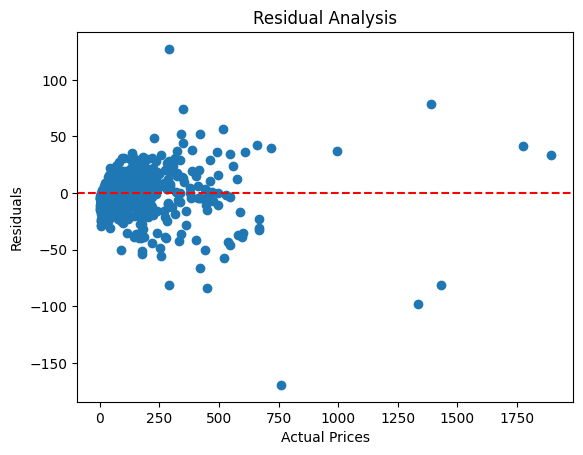

In [ ]:
import matplotlib.pyplot as plt

residuals = y_actual - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


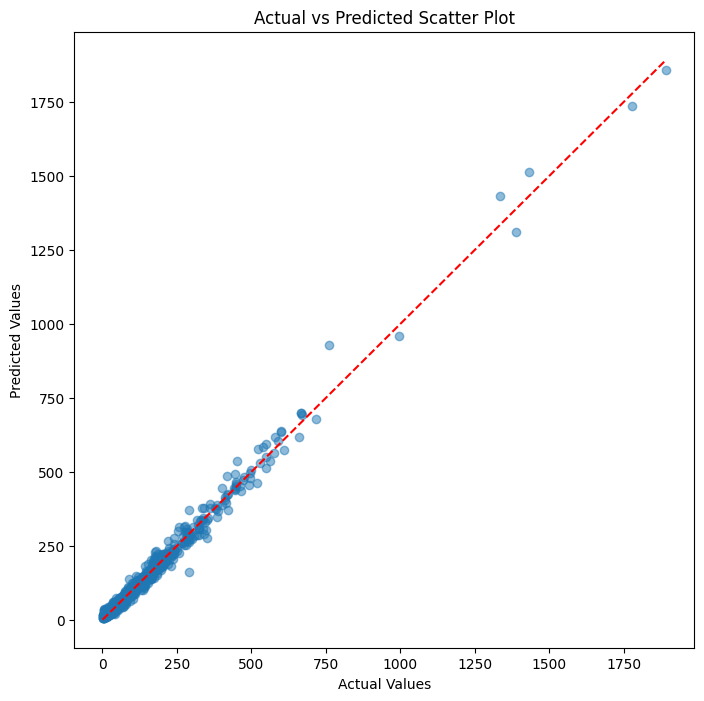

In [ ]:
plt.figure(figsize=(8, 8))

# Scatter plot of actual vs predicted values
plt.scatter(y_actual, y_pred, alpha=0.5)

# Plot a reference line
min_val = min(min(y_actual), min(y_pred))
max_val = max(max(y_actual), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

# Add labels and title
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Display the plot
plt.show()




In [ ]:
df.head()

,date,symbol,eps,epsEstimated,time,revenue,revenueEstimated,Price3DaysBefore,Price3DaysAfter,epsSurprise,revenueSurprise,epsRevenueInteraction,month,symbol_encoded,log_revenue,quarter
0,2024-05-09,AAOI,-0.31,-0.29,amc,40673000.0,43590000.0,11.95,10.00,-6.896552,-6.691902,46.151047,5,0,17.521075,2
1,2023-11-09,AAOI,-0.05,-0.05,amc,62547000.0,62610000.0,9.69,11.00,0.000000,-0.100623,-0.000000,11,0,17.951429,4
2,2023-08-03,AAOI,-0.21,-0.28,amc,41615000.0,45430000.0,6.75,12.38,25.000000,-8.397535,-209.938367,8,0,17.543971,3
3,2023-05-04,AAOI,-0.25,-0.18,amc,53030000.0,53770000.0,1.82,1.77,-38.888889,-1.376232,53.520137,5,0,17.786368,2
4,2023-02-23,AAOI,-0.19,-0.30,amc,61584000.0,61270000.0,2.72,2.59,36.666667,0.512486,18.791143,2,0,17.935913,1


In [ ]:
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [ ]:
df.loc[df["symbol"] == "AMD"]

,date,symbol,eps,epsEstimated,time,revenue,revenueEstimated,Price3DaysBefore,Price3DaysAfter,epsSurprise,revenueSurprise,epsRevenueInteraction,month,symbol_encoded,log_revenue,quarter
332,2024-10-29,AMD,0.92,0.923,amc,6.819000e+09,6.712440e+09,159.92,141.86,-0.325027,1.587495,-0.515979,10,22,22.642979,4
333,2024-07-30,AMD,0.69,0.678,amc,5.835000e+09,5.728585e+09,139.75,132.50,1.769912,1.857614,3.287813,7,22,22.487140,3
334,2024-04-30,AMD,0.62,0.616,amc,5.473000e+09,5.476961e+09,160.20,150.60,0.649351,-0.072327,-0.046966,4,22,22.423093,2
335,2024-01-30,AMD,0.77,0.770,amc,6.168000e+09,5.643760e+09,177.83,177.66,0.000000,9.288843,0.000000,1,22,22.542640,1
336,2023-10-31,AMD,0.70,0.680,amc,5.800000e+09,5.369880e+09,96.18,112.25,2.941176,8.009862,23.558419,10,22,22.481124,4
337,2023-08-01,AMD,0.58,0.570,amc,5.359000e+09,5.310690e+09,114.40,115.82,1.754386,0.909675,1.595920,8,22,22.402043,3
338,2023-05-02,AMD,0.60,0.560,amc,5.353000e+09,5.299960e+09,89.69,89.84,7.142857,1.000762,7.148302,5,22,22.400923,2
339,2023-01-31,AMD,0.69,0.660,amc,5.599000e+09,5.617610e+09,72.45,86.09,4.545455,-0.331280,-1.505817,1,22,22.445854,1
340,2022-02-01,AMD,0.92,0.760,amc,4.826000e+09,5.006540e+09,114.25,123.60,21.052632,-3.606083,-75.917542,2,22,22.297284,1
341,2021-10-26,AMD,0.73,0.670,amc,4.313000e+09,4.107640e+09,122.36,120.23,8.955224,4.999464,44.771323,10,22,22.184900,4


In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
import joblib

# Check if the stock name is present in the label encoder
stock_name = 'AMD'
if stock_name in label_encoder.classes_:
    # Encode the stock symbol
    symbol_encoded = label_encoder.transform([stock_name])[0]

    # Define test values for the custom input
    epsSurprise = 13.88
    revenueSurprise = 13.88


    # Prepare the specific input dictionary
    specific_input = {
        'eps': 0.41,
        'epsEstimated': 0.36,
        'epsSurprise': epsSurprise,
        'revenueSurprise': revenueSurprise,
        'Price3DaysBefore': 82.23,
        'month': 10,  # Assuming November
        'symbol_encoded': symbol_encoded
    }

    # Convert the dictionary into a DataFrame
    specific_input_df = pd.DataFrame([specific_input])

    # Load the saved scaler used during training
    scaler = joblib.load('scaler.joblib')

    # Preprocess the input using the scaler
    X_custom = scaler.transform(specific_input_df.values)

    # Convert the scaled data into a PyTorch tensor
    'X_custom_tensor = torch.tensor(X_custom, dtype=torch.float32)'

    # Ensure correct tensor shape (add batch dimension if needed)
    '''if X_custom_tensor.ndim == 1:
      X_custom_tensor = X_custom_tensor.unsqueeze(0)'''

    # Load the trained model
    ''' model
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()  # Set the model to evaluation mode'''

    prediction = model.predict(X_custom)[0]


    # Make the prediction
    '''with torch.no_grad():
        prediction = model(X_custom_tensor).item()'''

    print(f"Predicted Price 3 Days After: {prediction}")
else:
    print(f"Stock name '{stock_name}' not found in label encoder classes.")


Predicted Price 3 Days After: 79.58234924174343


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
